# Student Performance Review
***

## Content
- **Retrieving Dataset**
    * Importing the needed libraries
    * Reading the Dataset
- **Exploratory Data Analysis**
    * Checking for Null Values
    * Univariate, Bivariate and Multivariate Analysis
- **Statistical Analysis**
    * Correlation with target variable(G3)
    * Descriptive Statistics
- **Data Preprocessing**
    * Encoding the categorical variables
    * Further Exploration of the encoded categorical variables
- **Model Evaluation**
    * **Regression**
        * Estimating the mean square error(MSE), root mean square error(RMSE), Accuracy and R-square
        * Future Importance
    * **Classification**
        * Data Pre-processing
        * Handling Class Imbalance
        * Estimating the best parameter

***
## Retrieving Dataset
***

### Importing the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading the Dataset

In [2]:
#Reading the mathematics dataset 
math = pd.read_csv('student-mat.csv', sep = ';')

In [3]:
#The shape of the mathematics dataset
math.shape

(395, 33)

In [4]:
#First 5 records of the mathematics dataset
math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#Reading the portuguese dataset
port = pd.read_csv('student-por.csv', sep = ';')

In [6]:
#The shape of the portuguese dataset
port.shape

(649, 33)

In [7]:
#First 5 records of the portuguese dataset
port.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Merging the dataset

In [8]:
#Introducing a new column subject

math['subject'] = 'mathematics'
port['subject'] = 'portuguese'

A new column '**subject**' has been introduced to the dataset to be able to distinguish between the two subjects.

In [9]:
#Merging the dataset
data = pd.concat([math, port], ignore_index= True)

***
# Exploratory Data Analysis
***

In [10]:
#Reviewing the shape of the merged dataset
data.shape

(1044, 34)

The merged dataset has **1044** observations and **34** variables whose features would be explored below

In [11]:
#A review of the first 5 records of the merged dataset
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mathematics
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mathematics
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mathematics
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mathematics
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mathematics


In [12]:
#A review of the last 5 records of the merged dataset
data.tail(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
1039,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,portuguese
1040,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,portuguese
1041,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,portuguese
1042,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,portuguese
1043,MS,M,18,R,LE3,T,3,2,services,other,...,4,1,3,4,5,4,10,11,11,portuguese


In [13]:
#Getting more information about the merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [14]:
#Review the datatypes within the dataset
data.dtypes.value_counts()

object    18
int64     16
dtype: int64

The observed dataset is of two main data types (**object** and **int64**).
   - Variables containing the **object** datatype accounts for **53%(18)** of the entire variables in the dataset with **int64** accounting for **47%(16)**.

### Checking for Null Values

In [15]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
subject       0
dtype: int64

The merged dataset has no null values

### Univariate, Bivariate and Multivariate Analysis

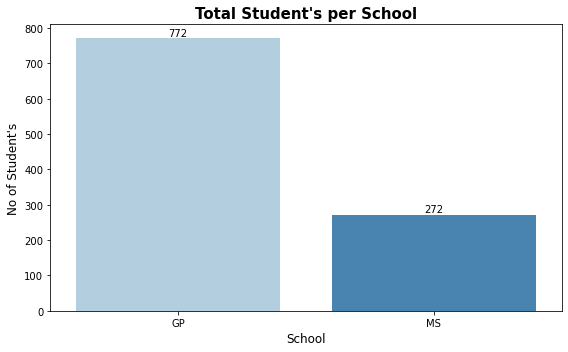

In [171]:
#Total number of students in each school
plt.figure(figsize= (8, 5))
students = sns.countplot(x = data['school'], palette = 'Blues')
students.set_xlabel('School', {'fontsize': 12})
students.set_ylabel('No of Student\'s', {'fontsize': 12})
students.set_title('Total Student\'s per School', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
students.bar_label(container= students.containers[0], labels= data['school'].value_counts(), label_type= 'edge')
plt.tight_layout()
plt.show()

About **73.9%** of the students performance records are from Gabriel Pereira(GP) school, while students from Mousinho da Silveira(MS) accounted for **26.1%** respectively.


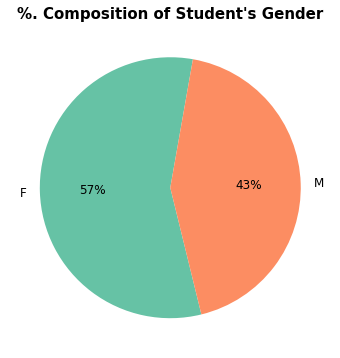

,F,M
sex,591,453


In [17]:
#Gender Compositon
plt.figure(figsize= (6, 6))
plt.title('%. Composition of Student\'s Gender', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
color = sns.color_palette('Set2')
plt.pie(data.sex.value_counts(), labels = data.sex.value_counts().index, autopct='%.0f%%', startangle= 80, colors= color,
       textprops= {'fontsize': 12})
plt.show()
print()
pd.DataFrame(data.sex.value_counts()).transpose()

About **591**(57%) out of total student performance records(**1,044**) belonged to the female gender.

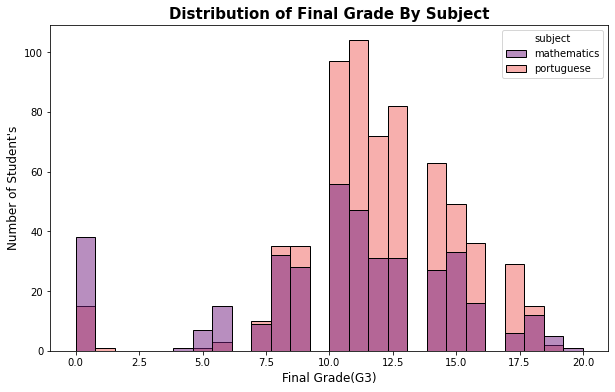

,mean,max,min
subject,,,
mathematics,10.42,20.0,0.0
portuguese,11.91,19.0,0.0


In [18]:
plt.figure(figsize=(10,6))
sns.histplot(data = data, x = 'G3', hue = 'subject', palette= 'magma')
plt.title('Distribution of Final Grade By Subject', fontdict = {'fontweight': 'bold','fontsize': 15})
plt.xlabel('Final Grade(G3)', fontdict= {'fontsize': 12})
plt.ylabel('Number of Student\'s',fontdict = {'fontsize': 12})
plt.show()

avg_score = round(data.groupby('subject')['G3'].mean(), 2)
max_score = round(data.groupby('subject')['G3'].max(), 2)
min_score = round(data.groupby('subject')['G3'].min(), 2)

pd.DataFrame(data = [avg_score, max_score, min_score], index = ['mean', 'max', 'min']).transpose()

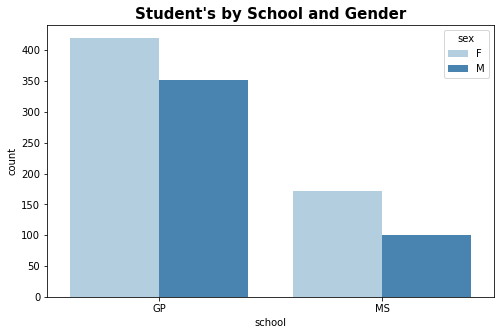

sex
school sex     
GP     F    420
       M    352
MS     F    171
       M    101

In [19]:
#Gender by school
plt.figure(figsize=(8, 5))
sns.countplot(x= 'school', hue = 'sex',data = data, palette = 'Blues')
plt.title("Student's by School and Gender", fontdict= {'fontweight': 'bold', 'fontsize': 15})
plt.show()

pd.DataFrame(data.groupby('school')['sex'].value_counts())

* Majority of the student's population are females in both schools.
* **54%** of the student's population are females for Gabriel Pereira(GP) and **63%** for Mousinho da Silveira(MS) respectively.

In [20]:
data.pivot_table(index = ['school','subject','sex'], values = 'G3', aggfunc= 'mean')

G3
school subject     sex           
GP     mathematics F     9.972678
                   M    11.060241
       portuguese  F    13.004219
                   M    12.032258
MS     mathematics F     9.920000
                   M     9.761905
       portuguese  F    11.034247
                   M     9.950000

* On average, male student's peformed better in Mathematics subject than female students in Gabriel Pereira. While female student's performed better in Mousinho da Silveira.
* On average, female student's performed better in Portuguese subject than male in both schools.

### Reviewing the dataset for outliers

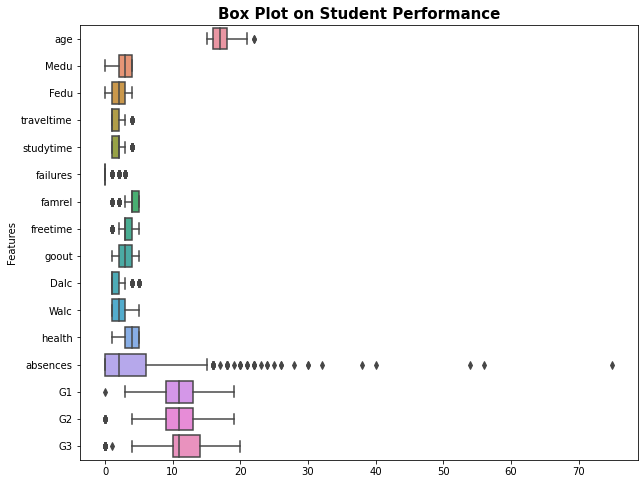

In [21]:
#Checking for outliers.
plt.figure(figsize= (10, 8))
out = sns.boxplot(data = data, orient = 'h')
out.set_title('Box Plot on Student Performance', fontdict = {'fontsize': 15,'fontweight': 'bold'})
out.set_ylabel('Features')
plt.show()

* Quite a number of variables within the dataset have outliers with absences having the highest number of outliers. 
* famrel, freetime, G1, G2 and G3 all have outliers around their minimum points
* age, traveltime, studytime, failures, Dalc and absences all have outliers around their maximum points.


In [22]:
data[data['age']> 20]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
247,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,5,5,1,16,6,8,8,mathematics
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,3,3,3,3,3,10,8,7,mathematics
674,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,5,5,1,12,7,8,5,portuguese
802,GP,F,21,U,LE3,T,4,4,other,other,...,3,2,1,1,5,0,9,12,12,portuguese
808,GP,M,21,R,LE3,T,1,1,at_home,other,...,3,3,5,2,4,21,9,10,10,portuguese


In [23]:
data[data['absences']> 15]['G3'].mean()

10.314814814814815

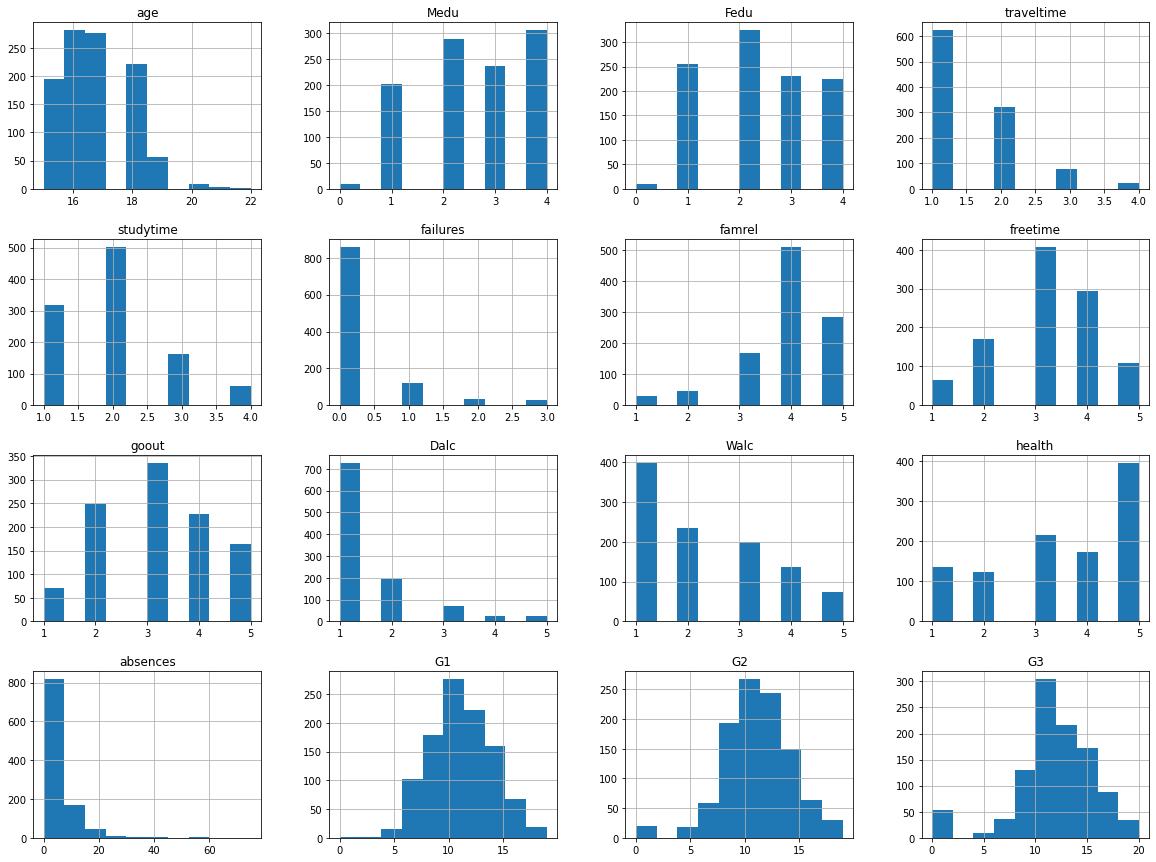

In [24]:
#Distribution of the features
data.hist(figsize= (20,15))
plt.show()

* The features of the student's performance dataset seems to be fairly normal, with student's grade G2 and G3 having a negatively skewed distribution which could be an influenced by outliers towards the lower score band.
* The distribution of the students age and abscences has a positively skewed distribution which could be influenced by the age distribution in the higher age category as well as the high number of absences.


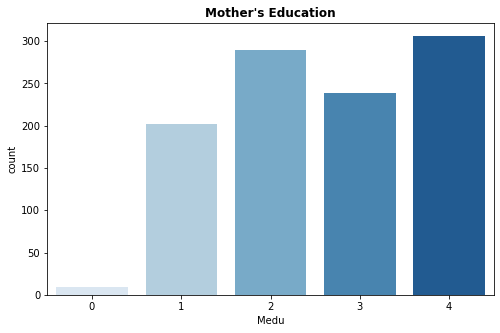

,4,2,3,1,0
Medu,306,289,238,202,9


In [25]:
#Reviewing the mother's education
plt.figure(figsize=(8,5))
sns.countplot(x= 'Medu', data = data, palette = 'Blues')
plt.title("Mother's Education", fontdict = {'fontweight': 'bold'})
plt.show()

pd.DataFrame(data.Medu.value_counts()).transpose()

- **29%(306)** of student mother's have higher education.
- About **52%(544)** of the student mother's have at least a secondary education.

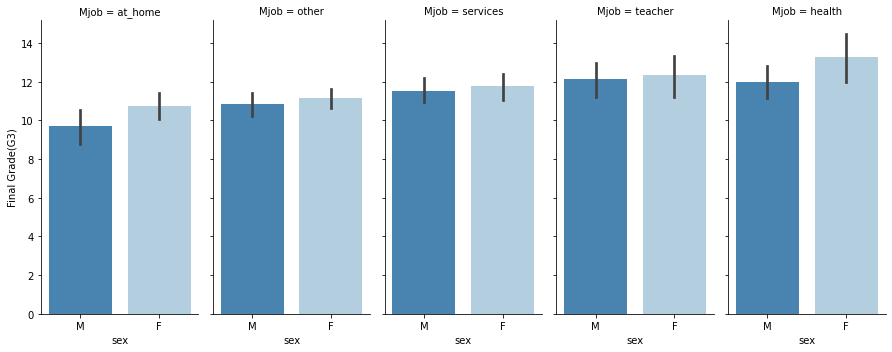

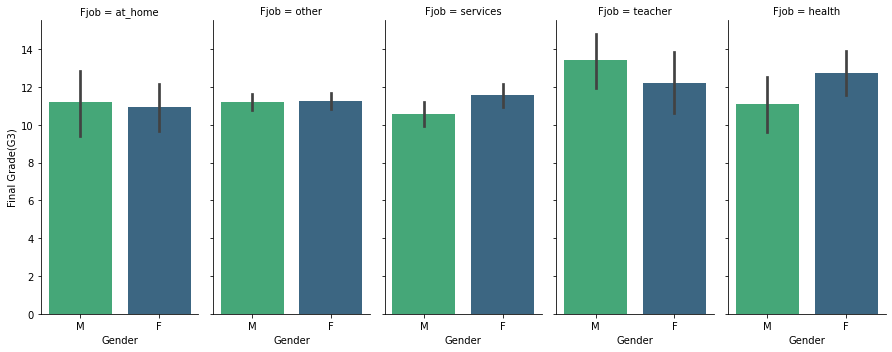

In [26]:
# plt.title('Effect of Mother Occupation on G3')
job = sns.FacetGrid(data, col="Mjob", height=5, aspect= 0.5, hue = 'sex', palette= 'Blues', 
                    col_order= ['at_home', 'other', 'services', 'teacher', 'health'])
job.map(sns.barplot, "sex", "G3", order=["M", "F"])
job.set(ylabel = 'Final Grade(G3)')
plt.show()


# plt.title('Effect of Father Occupation on G3')
job = sns.FacetGrid(data, col="Fjob", height=5, aspect= 0.5, hue = 'sex', palette= 'viridis',
                   col_order= ['at_home', 'other', 'services', 'teacher', 'health'])
job.map(sns.barplot, "sex", "G3", order=["M", "F"])
job.set(xlabel = 'Gender', ylabel = 'Final Grade(G3)')
plt.show()

- Among the mother's job catgory, student's whose mother's job is **health** tend to perform better.
- Similarly, among thefather's job category, student's whose father's are teachers tend to perform better.

In [27]:
#Average peformance by subject
round(data.groupby('subject')['G3'].mean(), 2)

subject
mathematics    10.42
portuguese     11.91
Name: G3, dtype: float64

In [28]:
#spread of final grade by subject
round(data.groupby('subject')['G3'].std(), 2)

subject
mathematics    4.58
portuguese     3.23
Name: G3, dtype: float64

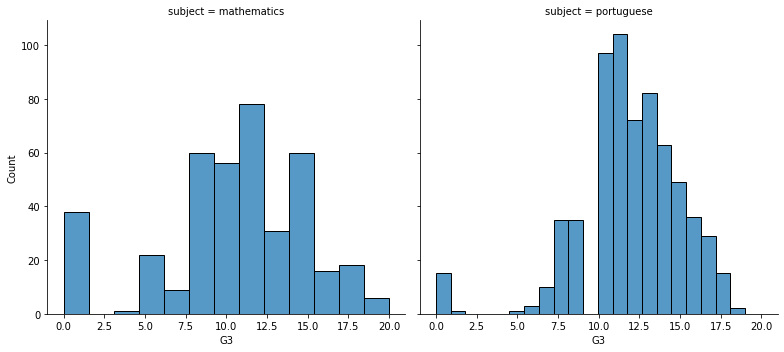

In [29]:
#Comparing final grade performance by subject
g = sns.FacetGrid(data, col="subject", height= 5, aspect= 1.1)
g.map(sns.histplot, "G3")
plt.show()

* On average, student's performance in Portuguese subject is slighty better than Mathematics with about **14.3%**.
* Final grade for student's performance in Mathematics are more spread out about the mean than in Portuguese, indicating a better performance in Portugeuse subject.
* The distribution of final grades in Portuguese subject is negatively skewed, while that in Mathematics has a fairly normal distribution.


***
# Statistical Analysis
***

In [30]:
from statistics_module import Statistics as stats

In [31]:
#Obtiaing the descriptive statistics
stats(data).descStat()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
Count,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00,1044.00
Mean,16.73,2.60,2.39,1.52,1.97,0.26,3.94,3.20,3.16,1.49,2.28,3.54,4.43,11.21,11.25,11.34
StanDev,1.24,1.12,1.10,0.73,0.83,0.66,0.93,1.03,1.15,0.91,1.28,1.42,6.21,2.98,3.28,3.86
Var,1.54,1.26,1.21,0.53,0.70,0.43,0.87,1.06,1.33,0.83,1.65,2.03,38.53,8.89,10.78,14.92
Mini,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,1.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,1.00,3.00,0.00,9.00,9.00,10.00
Median,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,2.00,4.00,2.00,11.00,11.00,11.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,3.00,5.00,6.00,13.00,13.00,14.00
Maxi,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,5.00,5.00,75.00,19.00,19.00,20.00
Skew,0.43,-0.14,0.12,1.37,0.67,2.78,-1.06,-0.18,0.04,2.16,0.63,-0.50,3.74,0.08,-0.50,-0.99


No of zero-grades:  53


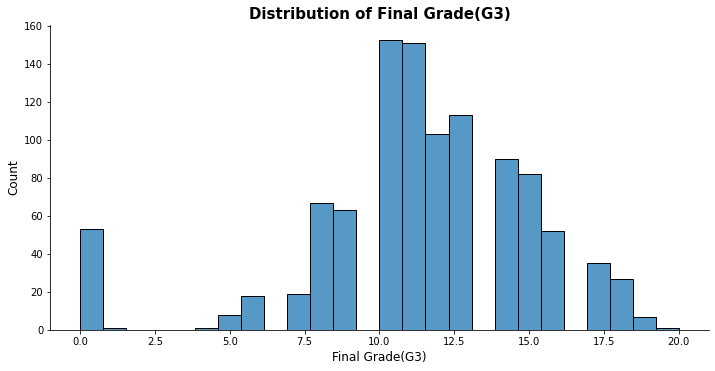

,Count,Mean,StanDev,Var,Mini,25%,Median,75%,Maxi,Skew,Kurt
G3,1044.00,11.34,3.86,14.92,0.00,10.00,11.00,14.00,20.00,-0.99,1.74


In [32]:
#Count of zero grades
print("No of zero-grades: ", data['G3'][data['G3']== 0].count())
#Final Grades Distribution
sns.displot(data['G3'],height= 5, aspect= 2)
plt.title('Distribution of Final Grade(G3)', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel('Final Grade(G3)', fontdict= {'fontsize': 12})
plt.ylabel('Count', fontdict= {'fontsize': 12})
plt.show()

G3_desc = stats(data[['G3']]).descStat().transpose()
G3_desc



The Final Grade(G3) has a negatively skewed distribution which is nearly normal. The grades are more spread out about the mean grade **11.34** with majority falling within the grade band **10 - 17** and a few higher than **17**. However, it is interesting to note that the mean final grade **(G3)** is slightly higher than the median **11**, which could be as a result of the influence of the **53** zero-grades on the distribution.

In [33]:
stats(data[['absences']]).Mean()

,Mean
absences,4.43


In [34]:
data.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mathematics
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mathematics
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mathematics
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mathematics
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mathematics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,1,2,1,1,1,2,7,10,10,mathematics
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,1,1,4,2,11,15,15,mathematics
97,GP,F,16,U,GT3,T,2,1,other,other,...,3,5,1,1,5,2,8,9,10,mathematics
98,GP,F,16,U,GT3,T,4,4,other,other,...,3,4,1,2,1,6,11,14,14,mathematics


In [35]:
#Checking correlation between the final grade and the features

print(data.corr()['G3'].sort_values(ascending=False))


G3            1.000000
G2            0.910743
G1            0.809142
Medu          0.201472
studytime     0.161629
Fedu          0.159796
famrel        0.054461
absences     -0.045671
freetime     -0.064890
health       -0.080079
goout        -0.097877
traveltime   -0.102627
Walc         -0.115740
age          -0.125282
Dalc         -0.129642
failures     -0.383145
Name: G3, dtype: float64


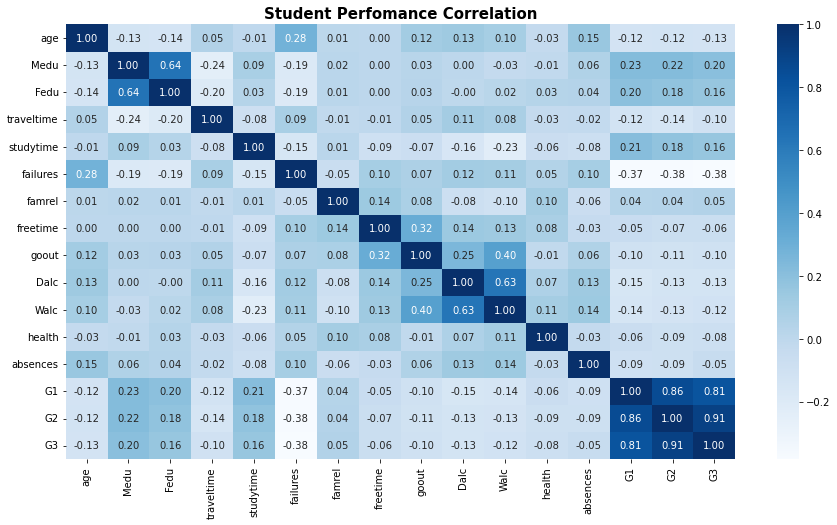

In [36]:
#plotting a heatmap to depict variable correlation
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot= True, fmt= '.2f', cmap = 'Blues' )
plt.title('Student Perfomance Correlation', fontdict= {'fontsize': 15, 'fontweight': 'bold'})
plt.show()

* **G1** and **G2** is observed to have a very high positive correlation with the final grade G3 this means that the first and second period grades greatly influences the outcome of the final grade.
* Mothe's education(Medu), Studytime and Father's education(Fedu) are also positively correlated with teh final grade G3.
* Although there is a correlation between family relationship(famrel) and the final grade, it doesn't really have much impact on the final grade.
* Number of past class failures has a negative correlation with the final grade thus, it would mean that as the number of past failures increases, the final grade would also tend to decrease.


***
# Data Preprocessing
***

**Encoding the categorical variables**

In [37]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'subject'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()

In [39]:
#encoding the categorical variables
encod_data = data.drop('subject', axis = 1)
cat = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob','reason', 'guardian', 
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery','higher', 'internet', 'romantic']

encod_data[cat] = encod_data[cat].apply(le.fit_transform)

In [40]:
encod_data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,5,4,2,1,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,4,4,4,1,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,4,1,4,1,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,4,2,2,1,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,5,5,1,1,1,5,0,14,15,15


In [41]:
encod_data.tail(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1034,1,1,19,0,0,1,1,1,2,3,...,4,3,2,1,3,5,0,5,8,0
1035,1,1,18,0,0,1,4,2,2,2,...,5,4,3,4,3,3,0,7,7,0
1036,1,0,18,0,0,1,2,2,0,2,...,5,3,3,1,3,4,0,14,17,15
1037,1,0,17,1,0,1,4,3,4,2,...,5,5,4,1,1,1,0,6,9,11
1038,1,0,18,0,0,1,4,4,4,0,...,4,4,3,2,2,5,4,7,9,10
1039,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
1040,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
1041,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
1042,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10
1043,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,4,10,11,11


In [42]:
encod_data.dtypes.value_counts()

int64    33
dtype: int64

The variables in the dataset are now in the **int64** datatype and can properly fit into a machine learning model

## Splitting the data

In [43]:
#Extracting the features as X
X = encod_data.iloc[:, :-1]
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


In [44]:
#Extracting the class as y
y = encod_data.iloc[:, -1]
y

0        6
1        6
2       10
3       15
4       10
        ..
1039    10
1040    16
1041     9
1042    10
1043    11
Name: G3, Length: 1044, dtype: int64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#Splits the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100) 

**80%** of the data would be used to train the machine learning models while **20%** of the dataset would be used to evaluate the models.

In [47]:
#review a sample of the train data
X_train[:5]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
588,0,1,17,1,0,1,4,3,2,2,...,1,5,2,3,1,1,2,4,11,11
549,0,0,16,1,1,1,1,1,0,0,...,0,3,4,4,3,3,1,4,10,11
1031,1,1,18,1,0,1,4,4,4,4,...,0,3,2,4,1,4,2,4,17,18
924,1,0,16,1,1,1,4,4,3,3,...,0,5,1,3,1,2,5,1,11,11
269,0,0,18,0,0,1,2,1,2,2,...,1,4,3,5,1,2,3,0,6,0


***
***
# Model Evaluation
***

## 1. Regression
***

### Model Evaluation Using Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
regr = RandomForestRegressor(n_estimators= 100, random_state=100)

In [50]:
#Training the Regression Model
regr.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

In [51]:
#Predict the final grade(G3) using the Regression Model
regr_pred = regr.predict(X_test).astype(int)

In [52]:
#Reviewing the first 5 predictions
regr_pred[:5]

array([13, 14,  1, 11,  6])

#### Estimating the mean square error(MSE), root mean square error(RMSE), Accuracy and R-square

In [53]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, balanced_accuracy_score

In [54]:
print('MSE :', round(mean_squared_error(y_test, regr_pred), 2))
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_test, regr_pred)), 2))
print('R-SQUARED :', round(r2_score(y_test, regr_pred), 2))
print('Accuracy :', round(accuracy_score(y_test, regr_pred), 2))


MSE : 2.91
RMSE : 1.71
R-SQUARED : 0.78
Accuracy : 0.34


- **78%** of the variation can be explained by the above Random Forest Regression Model. Thus, we are confident with the assumption that the model can be used to predict future values of **G3** up to **78%**.
- The Random Forest Regression Model is able to predict the student's final grade(G3) correctly up to **34%**.


#### Feature Importance

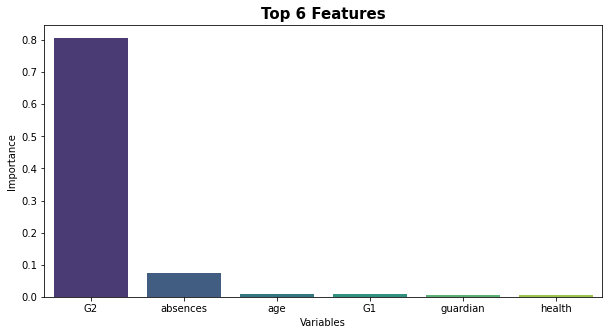

In [55]:
#Getting the feature importance
feature_names = [name for name in X.columns]
importances = regr.feature_importances_
plt.figure(figsize=(10, 5))
color = sns.color_palette("viridis", as_cmap=False)
sns.barplot(x= feature_names, y = importances, order=['G2', 'absences', 'age', 'G1', 'guardian', 'health'], orient= 'v' ,palette= color)
plt.title("Top 6 Features", fontdict = {'fontsize': 15, 'fontweight': 'bold'})
plt.xlabel("Variables")
plt.ylabel("Importance")
plt.show()

* The variable G2 has a larger effect in predicting the final grade(G3) on the Random Forest Regressor Model.

***
***

## 2. Classification
***

In [56]:
#Creating a copy of the data to be used for classification algorithms
data_class = encod_data.copy()

In [57]:
data_class.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10


### A). Data Preprocessing

In [58]:
print('Max :', data['G3'].max())
print('Mean :', round(data['G3'].mean(), 2))
print('Min :', data['G3'].min())

Max : 20
Mean : 11.34
Min : 0


In [59]:
#Categorising the student's based on their final grade G3

cat = (-1, 9, 17, 20)
cat_names = ['low', 'medium', 'high']

data_class['G3'] = pd.cut(data_class['G3'], bins= cat, labels = cat_names)

In [60]:
data_class.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,low
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,low
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,medium
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,medium
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,medium


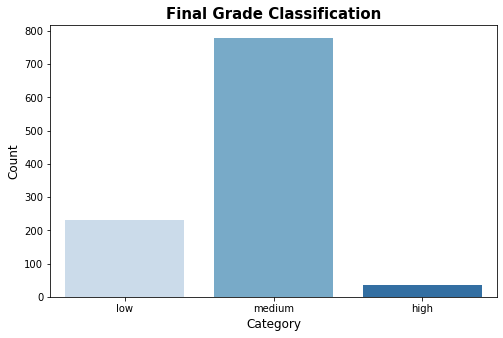

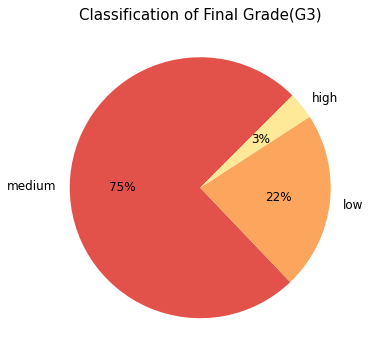

,medium,low,high
G3,779,230,35


In [61]:
#Classification of the final grade

#Checking for class imbalance
plt.figure(figsize= (8, 5))
category = sns.countplot(data = data_class, x = 'G3', palette= 'Blues')
category.set_xlabel('Category', fontsize = 12)
category.set_ylabel('Count', fontsize = 12)
category.set_title('Final Grade Classification', fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show()

#Pie chart to illustrate the classification of the final grade(G3)
plt.figure(figsize= (6, 6))
plt.title('Classification of Final Grade(G3)', fontdict= {'fontsize': 15})
color = sns.color_palette('Spectral')
plt.pie(data_class['G3'].value_counts(), labels = data_class['G3'].value_counts().index, startangle= 45, autopct='%.0f%%', colors= color,
       textprops= {'fontsize': 12})
plt.show()

#printing the values of the final grade classification
dist = pd.DataFrame(data_class['G3'].value_counts()).transpose()
dist

The distribution of the final grade(G3) is imbalanced, with students having Medium grade accounting for approximately **75%** of the observations. While Low and High at **22%** and **3%** respectively. Class imbalanced would be handled below using the following methods:
* Under-sampling
* Over-sampling
* Combined-sampling

### B). Handling Class Imbalance

####  i. Handling Class Imbalance Through Under-Sampling
***

In [62]:
from imblearn.under_sampling import RandomUnderSampler

In [63]:
rusp = RandomUnderSampler(random_state=100)

In [64]:
X_class = data_class.drop("G3", axis = 1)

In [65]:
y_class = data_class["G3"]

In [66]:
#Reviewing the undersampled data
X_resp, y_resp = rusp.fit_resample(X_class, y_class)
pd.DataFrame(y_resp.value_counts()).transpose()

,low,medium,high
G3,35,35,35


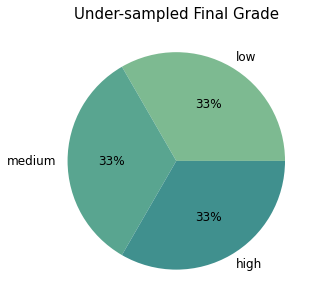

In [67]:
#Classification of Under-sampled final grade
plt.figure(figsize= (5,5))
color = sns.color_palette('crest')
plt.pie(y_resp.value_counts(),  labels= y_resp.value_counts().index, colors= color, autopct='%.0f%%', textprops= {'fontsize': 12})
plt.title("Under-sampled Final Grade", fontdict={'fontsize': 15})
plt.show()

Under-sampling has been performed on the training dataset, by removing samples from the majority class distribution (Medium: **779**  and Low: **230**) to balance the minority class distribution High: **35**.

#### Model Evaluation using Under-Sampling

In [68]:
#Spliting the undersampled data
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_resp, y_resp, test_size=0.2, random_state= 105)

#### Support Vector Machine(Under-sampled data)

In [69]:
from sklearn.svm import SVC

In [70]:
svc = SVC(kernel='rbf', C=1, gamma='auto')

In [71]:
#Training the model
svc.fit(X_train_u, y_train_u)

SVC(C=1, gamma='auto')

In [72]:
svc_pred_u = svc.predict(X_test_u)
print(svc_pred_u[:10])

['low' 'high' 'low' 'medium' 'medium' 'medium' 'high' 'medium' 'low'
 'medium']


In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
#obtains the confusion matrix
print(confusion_matrix(y_test_u, svc_pred_u))

[[7 0 1]
 [0 5 0]
 [0 2 6]]


From the confusion matrix, it was observed that the model:
- Out of **7** high grades, the model could correctly predict them as high.
- The model could predict correctly **5** low grades as low and wrongly predicted **2** as medium from **7** low grades.
- From **7** medium grades, the model could correctly predict them as **6** medium grades and wrongly predicted **1** as high.

In [75]:
#obtains the classification report
print(classification_report(y_test_u, svc_pred_u))

              precision    recall  f1-score   support

        high       1.00      0.88      0.93         8
         low       0.71      1.00      0.83         5
      medium       0.86      0.75      0.80         8

    accuracy                           0.86        21
   macro avg       0.86      0.88      0.86        21
weighted avg       0.88      0.86      0.86        21



**The below highlights can be obtained from the Classification Report of the under-sampled data using SVC Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **71%** for a low G3 and **86%** for a medium G3.
- **Recall :** **88%** of the students performance grades with a high **G3** where correctly identified, **100%** for a low G3 and **75%** for a medium G3.
- **F1-Score :** **93%** of positive predictions for a high final grade were correct, while **83%** for a low and **80%** for a medium G3 respectively.
- The accuracy of the model stood at **86%**.

#### Random Forest Classifier(Under-sampled data)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
#instantiate the model
rfc = RandomForestClassifier(n_estimators= 200, random_state= 110)

In [78]:
#Training the model
rfc.fit(X_train_u, y_train_u)

RandomForestClassifier(n_estimators=200, random_state=110)

In [79]:
#Predicting the final grade(G3) with undersampled data
rfc_pred_u = rfc.predict(X_test_u)
rfc_pred_u

array(['low', 'high', 'low', 'medium', 'medium', 'medium', 'high',
       'medium', 'low', 'medium', 'high', 'high', 'medium', 'high',
       'high', 'high', 'low', 'high', 'low', 'medium', 'low'],
      dtype=object)

In [80]:
print(confusion_matrix(y_test_u, rfc_pred_u))

[[8 0 0]
 [0 4 1]
 [0 2 6]]


From the confusion matrix, it was observed that the model:
- Out of **8** high grades, the model could correctly predict them as high.
- The model could predict correctly **4** low grades as low and wrongly predicted **2** as medium from **6** low grades.
- From **7** medium grades, the model could correctly predict them as **6** medium grades and wrongly predicted **1** as low.

In [81]:
print(classification_report(y_test_u, rfc_pred_u))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00         8
         low       0.67      0.80      0.73         5
      medium       0.86      0.75      0.80         8

    accuracy                           0.86        21
   macro avg       0.84      0.85      0.84        21
weighted avg       0.87      0.86      0.86        21



**The below highlights can be obtained from the Classification Report of the under-sampled data using Random Forest Classification Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **67%** for a low G3 and **86%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **80%** for a low G3 and **75%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **73%** for a low and **80%** for a medium G3 respectively.
- The accuracy of the model stood at **86%**.

#### Multi-Layer Perceptron Neural Networks(Under-sampled)

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
clf = MLPClassifier(solver='lbfgs')

In [84]:
#training the model
clf.fit(X_train_u, y_train_u)

MLPClassifier(solver='lbfgs')

In [85]:
#Predicting the final grade
clf_pred_u = clf.predict(X_test_u)
clf_pred_u

array(['medium', 'high', 'low', 'medium', 'medium', 'medium', 'high',
       'medium', 'low', 'medium', 'high', 'high', 'medium', 'high',
       'high', 'high', 'low', 'high', 'low', 'medium', 'low'], dtype='<U6')

In [86]:
print(confusion_matrix(y_test_u, clf_pred_u))

[[8 0 0]
 [0 4 1]
 [0 1 7]]


From the confusion matrix, it was observed that the model:
- Out of **8** high grades, the model could correctly predict them as high.
- The model could predict correctly **5** low grades as low and wrongly predicted **1** as medium from **6** low grades.
- From **7** medium grades, the model could correctly predict them as medium.

In [87]:
print(classification_report(y_test_u, clf_pred_u))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00         8
         low       0.80      0.80      0.80         5
      medium       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.89      0.89      0.89        21
weighted avg       0.90      0.90      0.90        21



**The below highlights can be obtained from the Classification Report of the under-sampled data using Multi-Layer Perceptron Neural Network Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **83%** for a low G3 and **100%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **100%** for a low G3 and **88%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **91%** for a low and **93%** for a medium G3 respectively.
- The accuracy of the model stood at **95%**.
- However, the weighted average of the F1-score stood at **95%** which was better than the previous two models using an undersampled data

#### ii. Handling Class Imbalance Through Over-Sampling
***

In [88]:
from imblearn.over_sampling import RandomOverSampler

In [89]:
rosp = RandomOverSampler(random_state=100)

In [90]:
#Reviewing the oversampled data
X_rosp, y_rosp = rosp.fit_resample(X_class, y_class)
pd.DataFrame(y_rosp.value_counts()).transpose()

,low,medium,high
G3,779,779,779


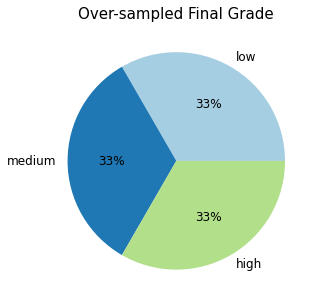

In [91]:
#Classification of over-sampled final grade
plt.figure(figsize= (5,5))
color = sns.color_palette('Paired')
plt.pie(y_rosp.value_counts(),  labels= y_rosp.value_counts().index, colors= color, autopct='%.0f%%', textprops= {'fontsize': 12})
plt.title("Over-sampled Final Grade", fontdict={'fontsize': 15})
plt.show()

Over-sampling has been performed on the training dataset, by adding samples to the minority classes distribution (low: **230**  and High: **35**) to balance the majority class distribution Medium: **779**.

#### Model Evaluation using Over-Sampling

In [92]:
#Spliting the oversampled data
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_rosp, y_rosp, test_size=0.2, random_state= 105)

#### Support Vector Machine(Over-sampled)

In [93]:
#Training the model
svc.fit(X_train_o, y_train_o)

SVC(C=1, gamma='auto')

In [94]:
#predicting the final grade 
svc_pred_o = svc.predict(X_test_o)
svc_pred_o[:10]

array(['medium', 'low', 'high', 'high', 'low', 'medium', 'high', 'high',
       'low', 'high'], dtype=object)

In [95]:
print(confusion_matrix(y_test_o, svc_pred_o))

[[151   0   0]
 [  0 149   4]
 [  2  14 148]]


From the confusion matrix, it was observed that the model:
- Out of **153** high grades, the model could correctly predict **151** as high and wrongly predicted **2** as medium.
- The model could predict correctly **149** low grades as low and wrongly predicted **14** as medium from **163** low grades.
- From **152** medium grades, the model could correctly predict **148** as medium and wrongly predicted **4** as low.

In [96]:
print(classification_report(y_test_o, svc_pred_o))

              precision    recall  f1-score   support

        high       0.99      1.00      0.99       151
         low       0.91      0.97      0.94       153
      medium       0.97      0.90      0.94       164

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



**The below highlights can be obtained from the Classification Report of the Over-sampled data using SVC Model:**
- **Precision :** The model is able to correctly predict **99%** of the student's performance with a high final grade(G3), **91%** for a low G3 and **97%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly classified, **97%** for a low G3 and **90%** for a medium G3.
- **F1-Score :** **99%** of positive predictions for a high final grade were correct, while **94%** for a low and **94%** for a medium G3 respectively.
- The accuracy of the model stood at **96%**.

#### Random Forest Classification(Over-sampled)

In [97]:
#Training the model
rfc.fit(X_train_o, y_train_o)

RandomForestClassifier(n_estimators=200, random_state=110)

In [98]:
#Predicting the final grade
rfc_pred_o = rfc.predict(X_test_o)
rfc_pred_o[:10]

array(['medium', 'low', 'high', 'high', 'low', 'medium', 'high', 'high',
       'low', 'high'], dtype=object)

In [99]:
print(confusion_matrix(y_test_o, rfc_pred_o))

[[151   0   0]
 [  0 150   3]
 [  2  15 147]]


From the confusion matrix, it was observed that the model:
- Out of **153** high grades, the model could correctly predict **151** as high and wrongly predicted **2** as medium.
- The model could predict correctly **150** low grades as low and wrongly predicted **15** as medium from **165** low grades.
- From **150** medium grades, the model could correctly predict **147** as medium and wrongly predicted **3** as low.

In [100]:
print(classification_report(y_test_o, rfc_pred_o))

              precision    recall  f1-score   support

        high       0.99      1.00      0.99       151
         low       0.91      0.98      0.94       153
      medium       0.98      0.90      0.94       164

    accuracy                           0.96       468
   macro avg       0.96      0.96      0.96       468
weighted avg       0.96      0.96      0.96       468



**The below highlights can be obtained from the Classification Report of the Over-sampled data using Random Forest Classification Model:**
- **Precision :** The model is able to correctly predict **99%** of the student's performance with a high final grade(G3), **91%** for a low G3 and **98%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly classified, **98%** for a low G3 and **90%** for a medium G3.
- **F1-Score :** **99%** of positive predictions for a high final grade were correct, while **94%** for a low and **94%** for a medium G3 respectively.
- The accuracy of the model stood at **96%**.

#### Multi-Layer Perceptron Neural Networks(Over-sampled)

In [101]:
clf_o = MLPClassifier(max_iter = 1000, random_state= 110)

In [102]:
#Training the model
clf_o.fit(X_train_o, y_train_o)

MLPClassifier(max_iter=1000, random_state=110)

In [103]:
#Predicting the final grade
clf_pred_o = clf_o.predict(X_test_o)
clf_pred_o[:10]

array(['medium', 'low', 'high', 'high', 'low', 'medium', 'high', 'high',
       'low', 'high'], dtype='<U6')

In [104]:
print(confusion_matrix(y_test_o, clf_pred_o))

[[151   0   0]
 [  0 150   3]
 [  3  10 151]]


From the confusion matrix, it was observed that the model:
- Out of **154** high grades, the model could correctly predict **151** as high and wrongly predicted **3** as medium.
- The model could predict correctly **150** low grades as low and wrongly predicted **10** as medium from **160** low grades.
- From **154** medium grades, the model could correctly predict **151** as medium and wrongly predicted **3** as low.

In [105]:
print(classification_report(y_test_o, clf_pred_o))

              precision    recall  f1-score   support

        high       0.98      1.00      0.99       151
         low       0.94      0.98      0.96       153
      medium       0.98      0.92      0.95       164

    accuracy                           0.97       468
   macro avg       0.97      0.97      0.97       468
weighted avg       0.97      0.97      0.97       468



**The below highlights can be obtained from the Classification Report of the Over-sampled data using Multi-Layer Perceptron Neural Network Model:**
- **Precision :** The model is able to correctly predict **99%** of the student's performance with a high final grade(G3), **93%** for a low G3 and **99%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **99%** for a low G3 and **93%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **96%** for a low and **96%** for a medium G3 respectively.
- The accuracy of the model stood at **97%**.

#### iii. Handling Class Imbalance Through Combined-Sampling
***

In [106]:
from imblearn.combine import SMOTEENN

In [107]:
smote_enn = SMOTEENN(random_state= 100)

In [108]:
#Reviewing the combined sample data
X_smote_enn, y_smote_enn = smote_enn.fit_resample(X_class, y_class)
pd.DataFrame(y_smote_enn.value_counts()).transpose()

,high,low,medium
G3,773,734,518


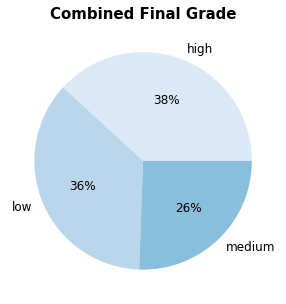

In [109]:
#Classification of Combined-sampled final grade
plt.figure(figsize= (5,5))
color = sns.color_palette('Blues')
plt.pie(y_smote_enn.value_counts(),  labels= y_smote_enn.value_counts().index, colors= color, autopct='%.0f%%', textprops= {'fontsize': 12})
plt.title("Combined Final Grade", fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.show()

#### Model Evaluation using Combined-Sampling

In [110]:
#Spliting the combined sample data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_smote_enn, y_smote_enn, test_size=0.2, random_state= 105)

#### Support Vector Machine (Combined-sampled Data)

In [111]:
#Training the model
svc.fit(X_train_c, y_train_c)

SVC(C=1, gamma='auto')

In [112]:
#Predicting final grade
svc_pred_c = svc.predict(X_test_c)
print(svc_pred_c[:5])

['medium' 'low' 'low' 'medium' 'high']


In [113]:
#obtain the confusion matrix
print(confusion_matrix(y_test_c, svc_pred_c))

[[166   0   0]
 [  0 136   2]
 [  0   4  97]]


From the confusion matrix, it was observed that the model:
- Out of **166** high grades, the model could correctly predict them as high.
- The model could predict correctly **136** low grades as low and wrongly predicted **4** as medium from **140** low grades.
- From **99** medium grades, the model could correctly predict **97** as medium and wrongly predicted **2** as low.

In [114]:
#print the classification report
print(classification_report(y_test_c, svc_pred_c))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       166
         low       0.97      0.99      0.98       138
      medium       0.98      0.96      0.97       101

    accuracy                           0.99       405
   macro avg       0.98      0.98      0.98       405
weighted avg       0.99      0.99      0.99       405



##### **The below highlights can be obtained from the Classification Report of the Combined-sampled data using Support Vector Machine Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **97%** for a low G3 and **98%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **99%** for a low G3 and **96%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **98%** for a low and **97%** for a medium G3 respectively.
- The accuracy of the model stood at **99%**.

#### Random Forest Classifier(Combined-sampled Data)

In [115]:
#Training the model
rfc.fit(X_train_c, y_train_c)

RandomForestClassifier(n_estimators=200, random_state=110)

In [116]:
#Predicting the final grade
rfc_pred_c = rfc.predict(X_test_c)
print(rfc_pred_c[:5])

['medium' 'low' 'low' 'medium' 'high']


In [117]:
#obtain the confusion matrix
print(confusion_matrix(y_test_c, rfc_pred_c))

[[166   0   0]
 [  0 136   2]
 [  0   3  98]]


In [118]:
from sklearn.metrics import ConfusionMatrixDisplay

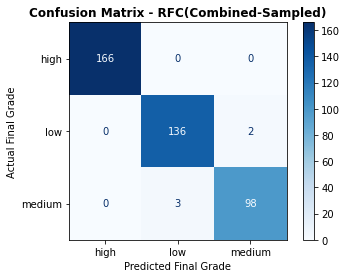

In [119]:
#Plotting the confusion matrix
plot = ConfusionMatrixDisplay.from_predictions(y_test_c, rfc_pred_c, cmap= 'Blues')
plt.xlabel("Predicted Final Grade")
plt.ylabel("Actual Final Grade")
plt.title("Confusion Matrix - RFC(Combined-Sampled)", fontdict = {'fontweight': 'bold'})
plt.show()

From the confusion matrix, it was observed that the model:
- Out of **166** high grades, the model could correctly predict them as high.
- The model could predict correctly **136** low grades as low and wrongly predicted **3** as medium from **139** low grades.
- From **100** medium grades, the model could correctly predict **98** as medium and wrongly predicted **2** as low.

In [120]:
#print the classification report
print(classification_report(y_test_c, rfc_pred_c))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       166
         low       0.98      0.99      0.98       138
      medium       0.98      0.97      0.98       101

    accuracy                           0.99       405
   macro avg       0.99      0.99      0.99       405
weighted avg       0.99      0.99      0.99       405



**The below highlights can be obtained from the Classification Report of the Combined-sampled data using Random Forest Classifier Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **98%** for a low G3 and **98%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **99%** for a low G3 and **97%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **98%** for a low and **98%** for a medium G3 respectively.
- The accuracy of the model stood at **99%**.

#### Multi-layer Perceptron Neural Networks(Combined-sampled Data)

In [121]:
#Training the model
clf_c = MLPClassifier(max_iter = 800, random_state= 110)
clf_c.fit(X_train_c, y_train_c)

MLPClassifier(max_iter=800, random_state=110)

In [122]:
#Predicting the final grade
clf_pred_c = clf_c.predict(X_test_c)

print(clf_pred_c[:10])

['medium' 'low' 'low' 'medium' 'high' 'medium' 'high' 'high' 'high' 'high']


In [123]:
print(confusion_matrix(y_test_c, clf_pred_c))

[[166   0   0]
 [  0 131   7]
 [  0   3  98]]


From the confusion matrix, it was observed that the model:
- Out of **166** high grades, the model could correctly predict them as high.
- The model could predict correctly **135** low grades as low and wrongly predicted **5** as medium from **140** low grades.
- From **99** medium grades, the model could correctly predict **96** as medium and wrongly predicted **3** as low.

In [124]:
#printing the classification report
print(classification_report(y_test_c, clf_pred_c))

              precision    recall  f1-score   support

        high       1.00      1.00      1.00       166
         low       0.98      0.95      0.96       138
      medium       0.93      0.97      0.95       101

    accuracy                           0.98       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.98      0.98      0.98       405



**The below highlights can be obtained from the Classification Report of the Combined-sampled data using Multi-Layer Perceptron Neural Network Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **98%** for a low G3 and **93%** for a medium G3.
- **Recall :** **100%** of the students performance grades with a high **G3** where correctly identified, **95%** for a low G3 and **97%** for a medium G3.
- **F1-Score :** **100%** of positive predictions for a high final grade were correct, while **96%** for a low and **95%** for a medium G3 respectively.
- The accuracy of the model stood at **98%**.

### C). Estimating the best parameter

In [125]:
from sklearn.model_selection import RandomizedSearchCV

#### Support Vector Machine (Best Parameter)

In [126]:
#Splitting the data
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_class, y_class, test_size=0.2, random_state= 105)

In [127]:
#instantiate the model
rsSVC = RandomizedSearchCV(SVC(gamma= 'auto', random_state= 110), {'C': [1, 5, 10, 15],
                                                'kernel' : ['linear', 'poly', 'rbf', 'sigmoid']},
                          cv= 5,
                          return_train_score= False,
                          n_iter= 5)

In [128]:
#Training the optimized model
rsSVC.fit(X_train_e, y_train_e)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto', random_state=110),
                   n_iter=5,
                   param_distributions={'C': [1, 5, 10, 15],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [129]:
#obtaining the best score
rsSVC.best_score_

0.8862275449101796

In [130]:
#obtianing the best parameters
rsSVC.best_params_

{'kernel': 'linear', 'C': 1}

In [154]:
#set the best parameters
svm_e = SVC(kernel= 'linear', C= 1)

In [155]:
#re-train with the best parameter
svm_e.fit(X_train_e, y_train_e)

SVC(C=1, kernel='linear')

In [156]:
#predicting the final grade
rssvm_pred = svm_e.predict(X_test_e)
print(rssvm_pred[:10])

['medium' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'medium' 'low'
 'medium']


In [157]:
#print the confusion matrix
print(confusion_matrix(y_test_e, rssvm_pred))

[[  5   0   5]
 [  0  28   6]
 [  2   8 155]]


From the confusion matrix, it was observed that the model:
- Out of **7** high grades, the model could correctly predict **5** as high and wrongly predicted **2** as medium.
- The model could predict correctly **28** low grades as low and wrongly predicted **8** as medium from **36** low grades.
- From **166** medium grades, the model could correctly predict them as **155** medium grades and wrongly predicted **6** as low and **5** as high grades.

In [135]:
#Gets the classification report using the best parameter for SVC
print("Classification Report using Best Parameter(SVC)")
print(classification_report(y_test_e, rssvm_pred))

Classification Report using Best Parameter(SVC)
              precision    recall  f1-score   support

        high       0.80      0.40      0.53        10
         low       0.78      0.82      0.80        34
      medium       0.93      0.95      0.94       165

    accuracy                           0.90       209
   macro avg       0.84      0.72      0.76       209
weighted avg       0.90      0.90      0.90       209



##### **The below highlights can be obtained from the Classification Report of the optimized parameter using Support Vector Machine Model:**
- **Precision :** The model is able to correctly predict **80%** of the student's performance with a high final grade(G3), **78%** for a low G3 and **93%** for a medium G3.
- **Recall :** **40%** of the students performance grades with a high **G3** where correctly identified, **82%** for a low G3 and **95%** for a medium G3.
- **F1-Score :** **53%** of positive predictions for a high final grade were correct, while **80%** for a low and **94%** for a medium G3 respectively.
- The accuracy of the model stood at **90%**.

#### Random Forest Classifier(Best Parameter)

In [136]:
#instantiate the model
rsRFC = RandomizedSearchCV(RandomForestClassifier(random_state= 110), 
                            {'bootstrap': [True, False],'criterion' : ['gini', 'entropy'],
                             'max_features': ['auto', 'sqrt', 'log2'],'n_estimators': [100,200, 500, 800, 1000]}, 
                           cv= 5, return_train_score= False, n_iter= 5)

In [137]:
#Training the model
rsRFC.fit(X_train_e, y_train_e)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=110),
                   n_iter=5,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [100, 200, 500, 800,
                                                         1000]})

In [138]:
#obtaining the best score
rsRFC.best_score_

0.8934131736526947

In [139]:
#obtianing the best parameters
rsRFC.best_params_

{'n_estimators': 1000,
 'max_features': 'auto',
 'criterion': 'entropy',
 'bootstrap': True}

In [158]:
#set the best parameters
rfc_e = RandomForestClassifier(n_estimators= 1000, max_features= 'auto', criterion = 'entropy', bootstrap= True)

In [159]:
#re-train with the best parameter
rfc_e.fit(X_train_e, y_train_e)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [142]:
#predicting the final grade
rsrfc_pred = rfc_e.predict(X_test_e)
print(rsrfc_pred[:10])

['medium' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'medium' 'low'
 'medium']


In [160]:
#print the confusion matrix
print(confusion_matrix(y_test_e, rsrfc_pred))

[[  3   0   7]
 [  0  28   6]
 [  0   8 157]]


From the confusion matrix, it was observed that the model:
- Out of **3** high grades, the model could correctly predict them as high.
- The model could predict correctly **28** low grades as low and wrongly predicted **8** as medium from **36** low grades.
- From **170** medium grades, the model could correctly predict them as **157** medium grades and wrongly predicted **6** as low and wrongly predicted **7** as high.

In [144]:
#Gets the classification report using the best parameter for RFC
print("Classification Report using Best Parameter(RFC)")
print(classification_report(y_test_e, rsrfc_pred))

Classification Report using Best Parameter(RFC)
              precision    recall  f1-score   support

        high       1.00      0.30      0.46        10
         low       0.78      0.82      0.80        34
      medium       0.92      0.95      0.94       165

    accuracy                           0.90       209
   macro avg       0.90      0.69      0.73       209
weighted avg       0.90      0.90      0.89       209



**The below highlights can be obtained from the Classification Report of the optimized parameter using Random Forest Classifier Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **78%** for a low G3 and **92%** for a medium G3.
- **Recall :** **30%** of the students performance grades with a high **G3** where correctly identified, **82%** for a low G3 and **95%** for a medium G3.
- **F1-Score :** **46%** of positive predictions for a high final grade were correct, while **80%** for a low and **94%** for a medium G3 respectively.
- The accuracy of the model stood at **90%**.

#### Multi-layer Perceptron Neural Networks (Best Parameter)

In [163]:
#instantiate the model
rsMLP = RandomizedSearchCV(MLPClassifier(max_iter = 1800), {'solver' : ['sgd' , 'adam'],
                                             'learning_rate' : ['constant', 'adaptive'],
                                            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                                                           'hidden_layer_sizes': [(50,50,50), (100,100,100), (150,100,150),(100,)]},
                          cv= 5, return_train_score= False)

In [164]:
#Training the model
rsMLP.fit(X_train_e, y_train_e)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(max_iter=1800),
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (100, 100, 100),
                                                               (150, 100, 150),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']})

In [165]:
#obtaining the best score
rsMLP.best_score_

0.8922155688622755

In [166]:
#obtianing the best parameters
rsMLP.best_params_

{'solver': 'sgd',
 'learning_rate': 'constant',
 'hidden_layer_sizes': (50, 50, 50),
 'activation': 'identity'}

In [167]:
#set the best parameters
clf_e = MLPClassifier(solver = 'sgd', learning_rate = 'constant', 
                      activation = 'identity', hidden_layer_sizes = (50, 50, 50))

In [168]:
#re-train with the best parameter
clf_e.fit(X_train_e, y_train_e)

MLPClassifier(activation='identity', hidden_layer_sizes=(50, 50, 50),
              solver='sgd')

In [169]:
#predicting the final grade
rsclf_pred = clf_e.predict(X_test_e)
print(rsclf_pred[:10])

['medium' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'medium'
 'medium' 'medium']


In [170]:
#print the confusion matrix
print(confusion_matrix(y_test_e, rsclf_pred))

[[  3   0   7]
 [  0  25   9]
 [  3  10 152]]


From the confusion matrix, it was observed that the model:
- Out of **6** high grades, the model could correctly predict **3** as high and wrongly predicted **3** as medium.
- The model could predict correctly **25** low grades as low and wrongly predicted **10** as medium from **35** low grades.
- From **168** medium grades, the model could correctly predict them as **152** medium grades and wrongly predicted **9** as low and wrongly predicted **7** as high.

In [153]:
#Gets the classification report using the best parameter for MLP
print("Classification Report using Best Parameter(MLP)")
print(classification_report(y_test_e, rsclf_pred))

Classification Report using Best Parameter(MLP)
              precision    recall  f1-score   support

        high       1.00      0.20      0.33        10
         low       0.77      0.79      0.78        34
      medium       0.91      0.95      0.93       165

    accuracy                           0.89       209
   macro avg       0.89      0.65      0.68       209
weighted avg       0.89      0.89      0.88       209



**The below highlights can be obtained from the Classification Report of the optimized parameter using Multi-Layer Perceptron Neural Network Model:**
- **Precision :** The model is able to correctly predict **100%** of the student's performance with a high final grade(G3), **77%** for a low G3 and **91%** for a medium G3.
- **Recall :** **20%** of the students performance grades with a high **G3** where correctly identified, **79%** for a low G3 and **95%** for a medium G3.
- **F1-Score :** **33%** of positive predictions for a high final grade were correct, while **78%** for a low and **93%** for a medium G3 respectively.
- The accuracy of the model stood at **89%**.